In [1]:
#TODO #3/4 of imports out 
%matplotlib inline 
from __future__ import division
from pylab import *
import skimage as ski
from skimage import data, io, filters, color
from skimage import img_as_float, img_as_ubyte
import skimage.morphology as mp
from skimage.color import rgb2hsv, hsv2rgb, rgb2gray
from matplotlib import pylab as plt
import numpy as np
from numpy import array
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
import math
from ipywidgets import interact, interactive, fixed

In [2]:
def bLine(x1,y1,x2,y2,): 
    x, y, d, dx, dy, ai, bi, xi, yi = 0,0,0,0,0,0,0,0,0
    x = x1 
    y = y1
    pixelArray =[]
    # ustalenie kierunku rysowania
    if (x1 < x2):
        xi = 1
        dx = x2 - x1;
    else:
        xi = -1
        dx = x1 - x2
    if (y1 < y2):
        yi = 1;
        dy = y2 - y1;
    else:
        yi = -1;
        dy = y1 - y2;
    #pierwszy piksel
    pixel= [x,y]
    pixelArray.append(pixel)
    #oœ wiod¹ca OX
    if (dx > dy):
        ai = (dy - dx) * 2;
        bi = dy * 2;
        d = bi - dx;
        #pêtla po kolejnych x
        while (x != x2): 
        #test wspó³czynnika
            if (d >= 0):
                x += xi
                y += yi
                d += ai
            else:
                d += bi
                x += xi
            pixel = [x,y]
            pixelArray.append(pixel)
    
    #oœ wiod¹ca OY
    else:
        ai = ( dx - dy ) * 2;
        bi = dx * 2;
        d = bi - dy;
        #pêtla po kolejnych y
        while (y != y2):
            #test wspó³czynnika
            if(d >= 0):
                x += xi;
                y += yi;
                d += ai;
            else:
                d += bi;
                y += yi;
            pixel= [x,y]
            pixelArray.append(pixel)
    
    return pixelArray
       

startx,starty: 150.0 150.0


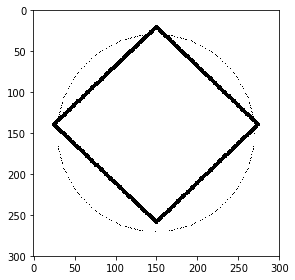

In [3]:
def pointCord(photo):
    startx,starty = photo.shape
    border_safer = startx/2 * 0.2
    startx,starty,radius = 0.5*startx,0.5*starty, (0.5*startx-border_safer)
    print("startx,starty: "+str(startx)+" "+str(starty))
    for angle in range(1,361,1):
        coss = math.cos((angle*math.pi)/180)
        sinn = math.sin((angle*math.pi)/180)
        xx = float(startx) + float(radius) * float(coss)
        yy = float(starty) + float(radius) * float(sinn)
        photo[int(xx)][int(yy)] = 0.0
        #print("Iter:"+str(angle)+"  x:"+str(xx)+"  y:"+str(yy)+" sin:"+str(sinn)+" cos:"+str(coss))
    #io.imshow(photo)
    return photo   
    
def drawCircle(photo):
    w,h = photo.shape
    xx,yy= w/2,h/2
    for i in range(w):
        for j in range(h):
            dist = math.hypot(abs(i-xx),abs(j-yy))
            if(dist > (w/2 - 0.4)  and dist < (h/2 + 0.4)):
                photo[i][j] = 0.0
    io.imshow(photo)

                                    
def tom():
    photo = io.imread("czarno_bialy_obraz.bmp", as_grey=True) # Y = 0.2125 R + 0.7154 G + 0.0721 B
    #photo = drawImageOnBackround(photo)
    #print(photo)
    #drawCircle(photo) 
    pointCord(photo)
    io.imshow(photo)
tom()

1.0
<class 'numpy.ndarray'>
[[ 111.  111.  111. ...,  111.  111.  111.]
 [ 111.  111.  111. ...,  111.  111.  111.]
 [ 111.  111.  111. ...,  111.  111.  111.]
 ..., 
 [ 111.  111.  111. ...,  111.  111.  111.]
 [ 111.  111.  111. ...,  111.  111.  111.]
 [ 111.  111.  111. ...,  111.  111.  111.]]


C:\Users\Dominik\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


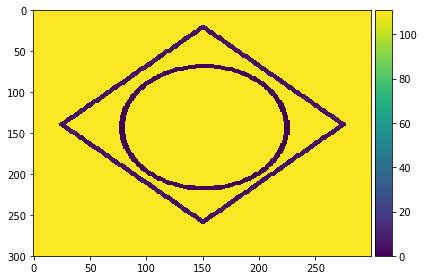

In [44]:

#obraz whrywany musi byc jako bmp monochromatyczna!!!!!!!!!!!!!!!!!!!!!!!
def drawImageOnBackround(photo):
    background= io.imread("czarne_tlo_200X200.bmp", as_grey=True);
    wPhoto,hPhoto = photo.shape
    wBackground, hBackground = background.shape
    printStart = (wBackground - wPhoto) / 2
    printStart= int (printStart)
    x=0
    y=0
    for i in range(wPhoto):
        for j in range(hPhoto):
            background[i + printStart][j + printStart] = photo[i][j]
            #print(str(background[i + printStart]) + " " + str(background[j + printStart]))
            #print(str(photo[i ]) + " " + str(photo[j ]))
            #print(photo[i][j])
            
    #io.imshow(photo)
    #io.imshow(background)
    return background

def imageToGrey(image):
    background= io.imread(image, as_grey=True);
    wPhoto,hPhoto = background.shape
    background = normalizeMatrix(background)
    for i in range(wPhoto):
        for p in range(hPhoto):
            background[i][p] = uint8(background[i][p])
    background = np.asarray(background)
    print(type(background))
    print(background)
    return background
    



#zamiana zadanego kata na wpolrzedne x,y na obrazku przy zadanym promieniu. zakladamy ze kwadrat
def angleToPoint(angle,radius,photoSize = 200): 
    startx = 0.5*photoSize
    coss = math.cos((angle*math.pi)/180)
    sinn = math.sin((angle*math.pi)/180)
    xx = float(startx) + float(radius) * float(coss)
    yy = float(startx) + float(radius) * float(sinn)
    xx=int(xx)
    yy=int(yy)
    return xx,yy


def drawLineOnPhoto(pixelArray,photo,color):
    for i in pixelArray:
        photo[i[0]][i[1]] = color
    return photo

def addGrzegorzValue(pixelArray,photo,color):
    for i in pixelArray:
        photo[i[0]][i[1]] += color
    return photo

def countLineValueOnPhoto(pixelArray,photo):
    result = 0
    numberOfPixels = 0
    for i in pixelArray:
        numberOfPixels += 1
        result =result +   photo[i[0]][i[1]]
    return result, numberOfPixels



def degreeToRadian(angle):
    return (angle*math.pi)/180

def angleIn360(angle):
    angle = angle %360
    if angle <0:
        angle = 360 + angle
    return angle







#1- kat polozenia emitera na kole, kat otwarcia emitera, liczba odbiornikow
def getReciversAngles(emitterPositionAngle = 0, emitterOpeningAngle =10,numberOfRecivers  =2):
    if emitterOpeningAngle >=180 or numberOfRecivers <1:
        return("BLAD")
    
    
    emitterPositionAngle = emitterPositionAngle %360
    
    if numberOfRecivers <=1:
        result = [(emitterPositionAngle +180)% 360]
        return result
    else:
        first = angleIn360(emitterPositionAngle +180 - emitterOpeningAngle)
        step = 2*emitterOpeningAngle / (numberOfRecivers-1)

        result =[first]
        for i in range(numberOfRecivers-1):
            result.append(angleIn360(first+step*(i+1)))
    return result


        
def normalizeMatrix(matrix,setMax=255):
    minimum = matrix[0][0]
    
    for i in range(len(matrix)):
        for p in range(len(matrix[0])):
            if matrix[i][p]< minimum:
                minimum = matrix[i][p]
    maximum = matrix[0][0]
    
    for i in range(len(matrix)):
        for p in range(len(matrix[0])):
            matrix[i][p] = matrix[i][p] - minimum
            if matrix[i][p] > maximum:
                maximum = matrix[i][p]
    print(maximum)
    for i in range(len(matrix)):
        for p in range(len(matrix[0])):
            matrix[i][p] = uint8(matrix[i][p] / maximum * setMax)
            
    return matrix

io.imshow(imageToGrey("obraz.bmp"),interpolation='nearest', aspect='auto')


In [45]:
def tomograf(emitterPositionAngle, emitterOpeningAngle ,numberOfRecivers,showImage = True, countPixels = True ):
    photo = io.imread("strzalka_100x100.bmp",as_grey=True)
    photo = drawImageOnBackround(photo)
    recivers = getReciversAngles(emitterPositionAngle, emitterOpeningAngle,numberOfRecivers)
    xEmitter,yEmitter = angleToPoint(emitterPositionAngle,80)
    lines = []
    linesValues=[]
    TotalValuePixels=[]
    TotalNumberOfPixels=[]
    for i in recivers:
        x,y = angleToPoint(i,80)
        line = bLine(xEmitter, yEmitter,x,y)
        lines.append(line)
        if countPixels:
            valueOfLine, numberOfPixels = countLineValueOnPhoto(line,photo)
            TotalValuePixels.append(valueOfLine)
            TotalNumberOfPixels.append(numberOfPixels)
        if showImage:
            photo = drawLineOnPhoto(line,photo,255)

    

    if showImage:   
        figure(figsize = (10,10))
        io.imshow(photo,interpolation='nearest', aspect='auto')

    return TotalValuePixels

interact(tomograf, emitterPositionAngle=(0,359, 1),emitterOpeningAngle =(1,179,1),numberOfRecivers  =(1,100,1))

A Jupyter Widget

<function __main__.tomograf>

19890


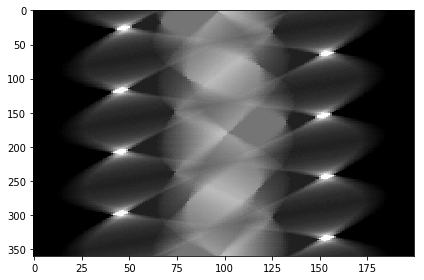

In [37]:
def tomografToSinogram(step, emitterOpeningAngle ,numberOfRecivers):
    emitterPosition=0
    sinogram=[]
    while emitterPosition <360:
        reciversValues = tomograf(emitterPosition, emitterOpeningAngle ,numberOfRecivers,showImage = False, countPixels = True )
        sinogram.append(reciversValues)
        emitterPosition +=step
    normalizeMatrix(sinogram)
    numpySinogram = np.asarray(sinogram)
    io.imshow(numpySinogram,interpolation='nearest', aspect='auto')
    return sinogram, step, emitterOpeningAngle

tmpSinogram, tmpStep,tmpEmitterOpeningAngle = tomografToSinogram(1, 100 ,200)



499.636103502


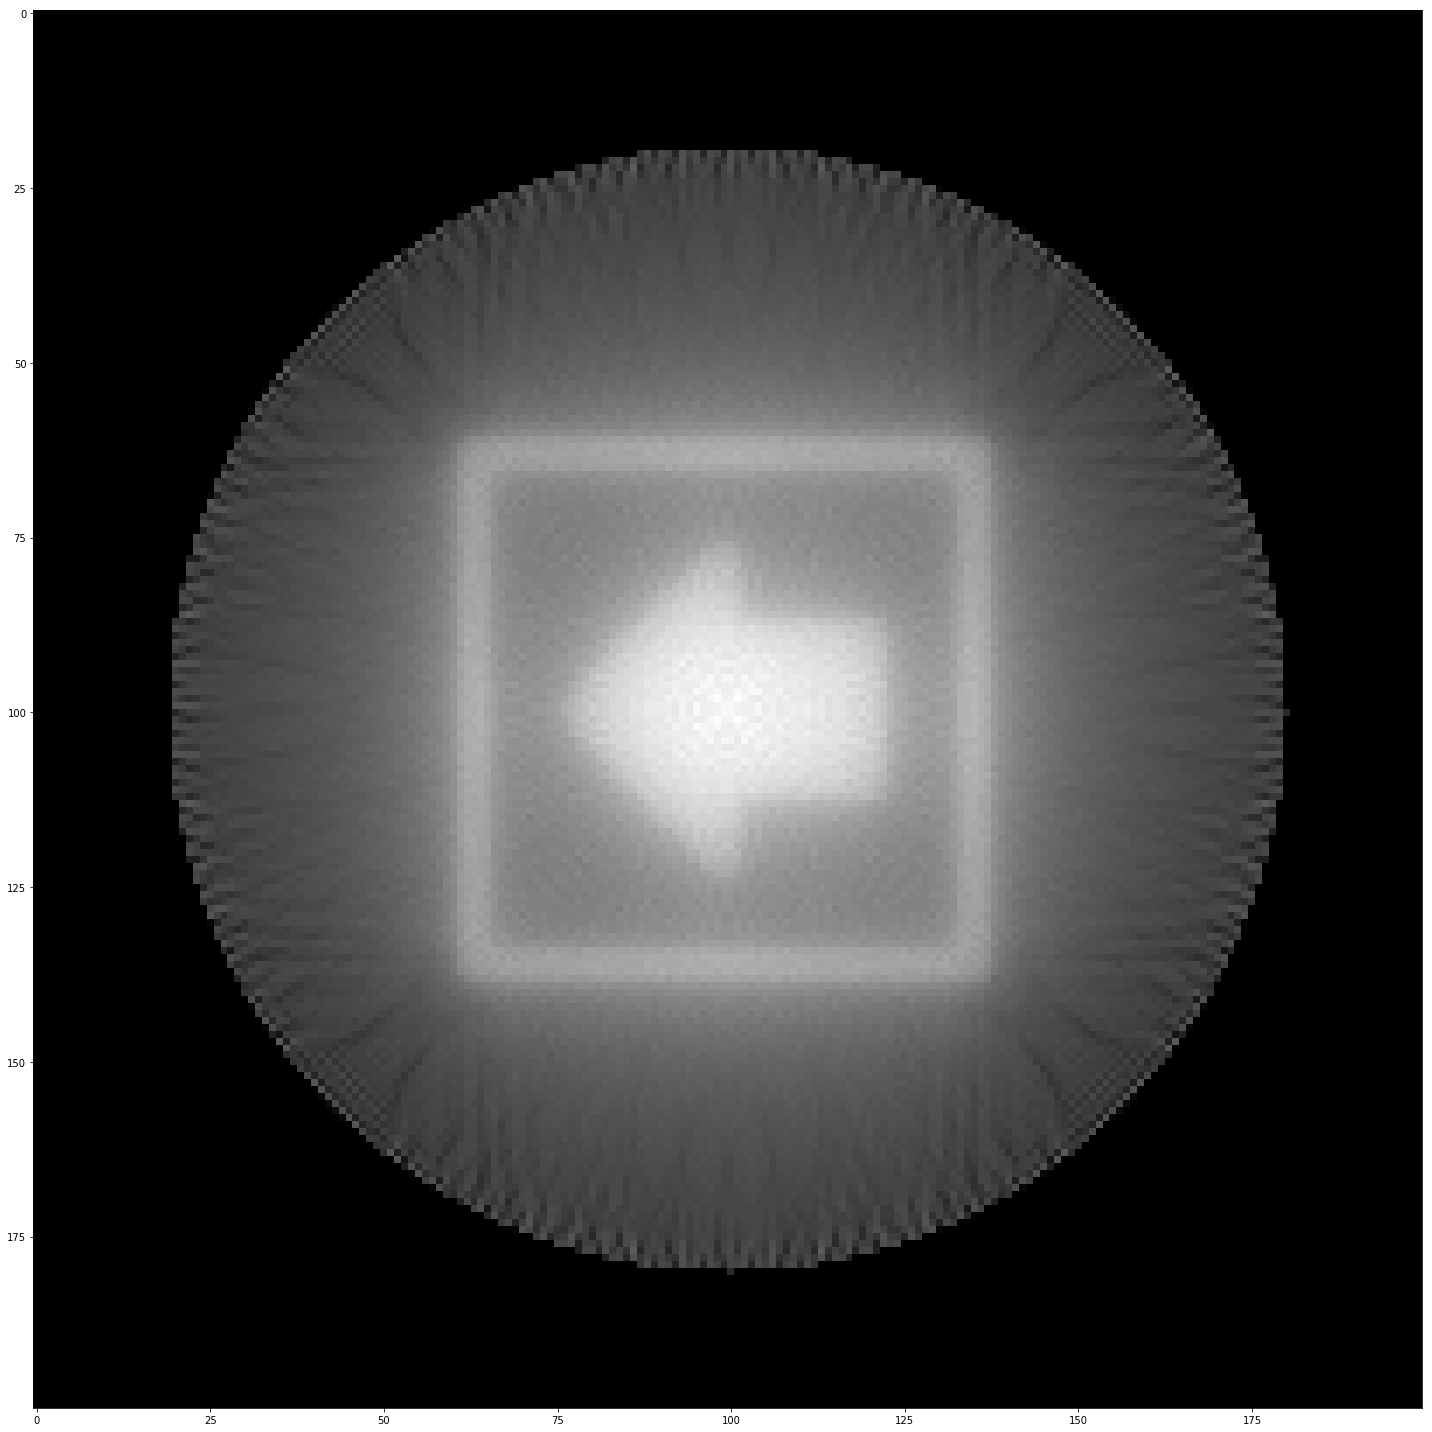

In [38]:
def sinogramToTomograf2(sinogram,step,emitterOpeningAngle):
    emitterPosition = 0
    background = []
    for i in range(200):
        a =[]
        for p in range(200):
            a.append(0)
        background.append(a)
    i=0
    while emitterPosition <360:
        xEmitter, yEmitter = angleToPoint(emitterPosition,80)
        reciversValues = sinogram[i]
        numberOfRecivers = len(reciversValues)
        reciversAngles = getReciversAngles(emitterPosition, emitterOpeningAngle,numberOfRecivers)
        p=0
        for p in range(len(reciversAngles)):
            xReciver,yReciver = angleToPoint(reciversAngles[p],80)
            line =  bLine(xEmitter, yEmitter,xReciver,yReciver)
            pixelCount = len(line)
            color = reciversValues[p] / pixelCount
            addGrzegorzValue(line,background,color)
            
        
        i+=1
        emitterPosition +=step
    background = normalizeMatrix(background)
    numpyBackground = np.asarray(background)

    figure(figsize = (20,20))
    io.imshow(numpyBackground,interpolation='nearest', aspect='auto',cmap = plt.cm.gray)
        
sinogramToTomograf2(tmpSinogram, tmpStep,tmpEmitterOpeningAngle)